In [5]:
## Load modules
import runpy
# The following are needed to load the plotting tool as a module
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept

import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_adj
import dask.array as da

# import the ECCOv4 py library 
# tell Python to use the ecco_v4_py in the 'ECCOv4-py' repository
from os.path import join,expanduser
import sys
# identify user's home directory
user_home_dir = expanduser('~')
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

import cartopy
import cartopy.crs as ccrs

from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import xarray as xr


In [6]:

# Load grid 
ecco_grid = xr.open_dataset('/efs_ecco/ECCO/V4/r4/ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
ecco_grid.load()

# Get the model grid longitude and latitude
XC = ecco_grid.XC.values # modle grid longitude (13x90x90) 
YC = ecco_grid.YC.values # latitudes
# Also grid cell areaa in (m^2)
rA = ecco_grid.rA.values
maskC = ecco_grid.maskC.values # 3d mask (0/1) for model grid (tracer point)
maskCSurf = maskC[0] # maskC at surface level (level = 1)
hFacC = ecco_grid.hFacC.values # 3d non-dim factors (0-1) reflecing model cell geometry in vertical direction. Partial cells have values >0 but <1.
Zl = ecco_grid.Zl.values # depth of vertical cell face: between 0 and -5678 meters
Z  = ecco_grid.Z.values # depth of vertical cell ceter: between -10 and -5906 meters
drF = ecco_grid.drF.values # layer thickness (m); 1d with 50 elements

# More fields for the western and southern faces of grid cells. U is on the west face and V is on the southern face.
# They are the same as the fields above (C for tracer points at the center of grid cells).
# We need these fields for creating transport masks
maskW = ecco_grid.maskW.values # 3d mask (0/1) for model grid (U point)
maskWSurf = maskW[0] # maskW at surface level (level = 1)
hFacW = ecco_grid.hFacW.values 

maskS = ecco_grid.maskS.values # 3d mask (0/1) for model grid (V point)
maskSSurf = maskS[0] # maskS at surface level (level = 1)
hFacS = ecco_grid.hFacS.values 

# dxG and dyG are the horizontal grid spacing (meters) for the western and southern faces, respectively.
dxG = ecco_grid.dxG.values
dyG = ecco_grid.dyG.values


In [4]:
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.

globals_dict = ept.emu_plot(run_name="/efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_adj_156_156_3_mask3d_ccc_subsurf.bin_1",
                            ctrl_num_list=[1, 2, 3, 4, 5, 6, 7, 8],
                            lag_beg=0, lag_end=1000000)

# Return variables used to make the plot
return_vars_dict = globals_dict.get('return_vars')

# # Check the keys in the dictionary
return_vars_dict.keys()


Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_adj_156_156_3_mask3d_ccc_subsurf.bin_1

Reading /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_adj_156_156_3_mask3d_ccc_subsurf.bin_1

Reading Adjoint Tool output ... 

Found file: adxx_empmr.0000000129.data

*********************************************
Read adjoint gradient for empmr
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/ywu/ECCO/EMU/SHERLOCCS/emu_adj_156_156_3_mask3d_ccc_subsurf.bin_1/output/adxx_empmr.0000000129.data
 
Zero lag at (week/record) = 680
Max  lag at (week/record) = 470
Specified start and end files #: 0 and 1000000

*********************************************
Outputting adxx_empmr

Found file: adxx_pload.0000000129.data

*********************************************
Read adjoint gradient for pload
   adxx: adjoint gradient as a

dict_keys(['adxx_empmr_filename', 'adxx_empmr', 'adxx_empmr_lag0', 'adxx_empmr_lagmax', 'adxx_empmr_lag_beg', 'adxx_empmr_lag_end', 'adxx_pload_filename', 'adxx_pload', 'adxx_pload_lag0', 'adxx_pload_lagmax', 'adxx_pload_lag_beg', 'adxx_pload_lag_end', 'adxx_qnet_filename', 'adxx_qnet', 'adxx_qnet_lag0', 'adxx_qnet_lagmax', 'adxx_qnet_lag_beg', 'adxx_qnet_lag_end', 'adxx_qsw_filename', 'adxx_qsw', 'adxx_qsw_lag0', 'adxx_qsw_lagmax', 'adxx_qsw_lag_beg', 'adxx_qsw_lag_end', 'adxx_saltflux_filename', 'adxx_saltflux', 'adxx_saltflux_lag0', 'adxx_saltflux_lagmax', 'adxx_saltflux_lag_beg', 'adxx_saltflux_lag_end', 'adxx_spflx_filename', 'adxx_spflx', 'adxx_spflx_lag0', 'adxx_spflx_lagmax', 'adxx_spflx_lag_beg', 'adxx_spflx_lag_end', 'adxx_tauu_filename', 'adxx_tauu', 'adxx_tauu_lag0', 'adxx_tauu_lagmax', 'adxx_tauu_lag_beg', 'adxx_tauu_lag_end', 'adxx_tauv_filename', 'adxx_tauv', 'adxx_tauv_lag0', 'adxx_tauv_lagmax', 'adxx_tauv_lag_beg', 'adxx_tauv_lag_end'])

In [7]:
# to check the lag maximum
var = 'qnet'
return_vars_dict = globals_dict.get('return_vars')
return_vars_dict['adxx_' + var].shape # 211 is the maximum lag weeks

(211, 1170, 90)

llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


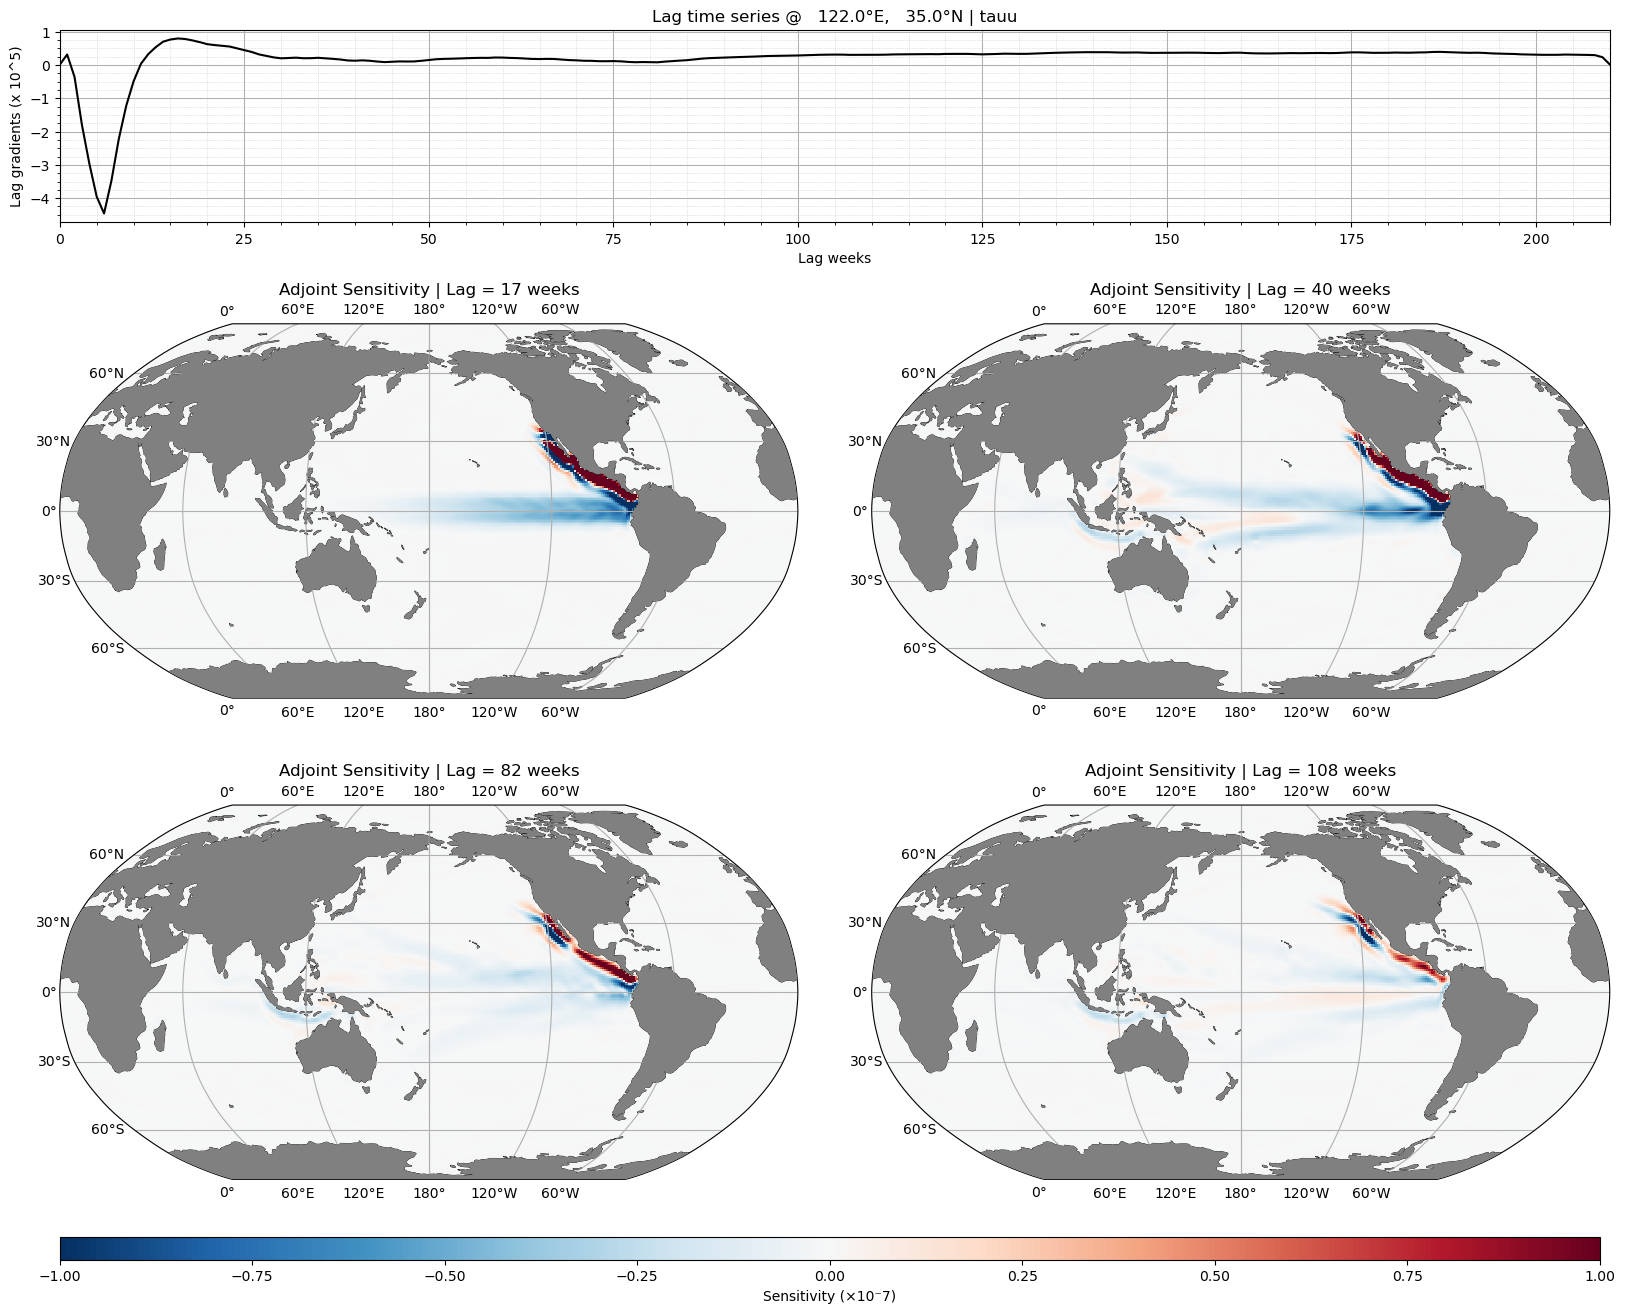

In [8]:
# Plot sensitivity: choosing four weeks to check
var = 'tauu'

return_vars_dict = globals_dict.get('return_vars')
adj2d_all = return_vars_dict['adxx_' + var]
fname = return_vars_dict['adxx_' + var + '_filename']
lag0 = return_vars_dict['adxx_' + var + '_lag0']
lagmax = return_vars_dict['adxx_' + var + '_lagmax']
nlag = lag0-lagmax+1
ww = np.arange(nlag)
scale_factor = 1e3

# Set up figure 
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(3, 2, height_ratios=[1, 2, 2], hspace=0.3, wspace=0.1)

# Time Series on Top (Full Width) 
ax0 = fig.add_subplot(gs[0, :])  # span both columns
ftitle = f'Lag time series @ {122:7.1f}°E, {35:6.1f}°N | {var}'
ax0.plot(ww, adj2d_all[:, 916-1, 63-1]*scale_factor, 'k')

# Major and minor grid
ax0.grid(True, which='major', linewidth=0.75)
ax0.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Enable minor ticks
ax0.minorticks_on()

# Optional: Set custom minor tick locator
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))  # 5 minor ticks per major interval
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))

# Title and limits
ax0.set_xlim([0, 210])
ax0.set_xlabel('Lag weeks')
ax0.set_ylabel('Lag gradients (x 10^5)')
ax0.set_title(ftitle)

# Global Maps in 2x2 layout 
lags_to_plot = [17, 40, 82, 108]
projection = ccrs.Robinson(central_longitude=180)
map_axes = [fig.add_subplot(gs[i//2 + 1, i % 2], projection=projection) for i in range(4)]

cf = None  # placeholder for colorbar
for i, lag_num in enumerate(lags_to_plot):
    ax = map_axes[i]
    adj2d_all_plt = ecco.llc_compact_to_tiles(adj2d_all[lag_num])
    
    for t in range(13): 
        cf = ax.pcolormesh(XC[t], YC[t], 
                           adj2d_all_plt[t]*scale_factor,
                           vmin=-1, vmax=1, cmap='RdBu_r', 
                           transform=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cartopy.feature.LAND, facecolor='grey', zorder=10)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
    ax.gridlines(draw_labels=True)
    ax.set_title(f'Adjoint Sensitivity | Lag = {lag_num} weeks')
    
# --- Colorbar in empty 2x2 slot or below ---
# Position: [left, bottom, width, height] in figure coordinates
cbar_ax = fig.add_axes([0.125, 0.06, 0.77, 0.015])  # adjust as needed
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Sensitivity (×10⁻7)')
plt.show()
# plt.savefig('/efs_ecco/ywu/adjoint_sensitivity_qnet.png', dpi=500, bbox_inches='tight')


In [14]:
# Plot qnet sensitivity at each lag (for animation making)
from IPython.display import clear_output

# control forcings: empmr, pload, qnet, qsw, saltflux, spflx, tauu, tauv
var = 'qnet'

return_vars_dict = globals_dict.get('return_vars')
adj2d_all = return_vars_dict['adxx_' + var]
fname = return_vars_dict['adxx_' + var + '_filename']
lag0 = return_vars_dict['adxx_' + var + '_lag0']
lagmax = return_vars_dict['adxx_' + var + '_lagmax']
nlag = lag0-lagmax+1
ww = np.arange(nlag)
scale_factor = 1e7

for lag_num in range(211):
    print('lag @ week ' + str(lag_num) + '.')
    fig = plt.figure(figsize=(14, 10))
    gs = GridSpec(2, 1, height_ratios=[1, 2], hspace=0.25)
    
    # --- Time Series Plot ---
    ax0 = fig.add_subplot(gs[0])
    ftitle = f'Lag time series @ {122:7.1f}°E, {35:6.1f}°N | {var}'
    ax0.plot(ww, adj2d_all[:, 916-1, 63-1]*scale_factor, 'k')
    ax0.axvline(lag_num, color='red', linestyle='--')  # highlight current lag
    
    ax0.grid(True, which='major', linewidth=0.75)
    ax0.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)
    ax0.minorticks_on()
    ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    ax0.set_xlim([0, nlag-1])
    ax0.set_xlabel('Lag weeks')
    ax0.set_ylabel('Lag gradients (×10⁻3)')
    ax0.set_title(ftitle)
    
    # --- Map Plot ---
    ax = fig.add_subplot(gs[1], projection=ccrs.Robinson(central_longitude=180))
    adj2d_all_plt = ecco.llc_compact_to_tiles(adj2d_all[lag_num])
    
    cf = None
    for t in range(13):
        cf = ax.pcolormesh(XC[t], YC[t], 
                           adj2d_all_plt[t]*scale_factor,
                           vmin=-1, vmax=1, cmap='RdBu_r', 
                           transform=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cartopy.feature.LAND, facecolor='grey', zorder=10)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
    ax.gridlines(draw_labels=True)
    ax.set_title(f'Adjoint Sensitivity | Lag = {lag_num} weeks')
    
    # --- Shared Colorbar ---
    cbar_ax = fig.add_axes([0.15, 0.085, 0.7, 0.02])
    cbar = fig.colorbar(cf, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Sensitivity (×10⁻7)')
    
    # --- Save Each Frame ---
    outpath = f'/efs_ecco/ywu/adjoint_sensitivity_qnet_lag{lag_num:03d}.png'
    plt.savefig(outpath, dpi=500, bbox_inches='tight')
    plt.close(fig)
    # plt.show()
    clear_output(wait=True)



lag @ week 210.
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
